<a href="https://colab.research.google.com/github/shahidulislamkhokon/COVID-19/blob/master/Big_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Spark Installation**

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -U pyarrow
!pip install pyspark

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ge

In [ ]:
!ls /usr/lib/jvm/

default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
import findspark    # to initialize pyspark
findspark.init()

import pyspark    #path at runtime
from pyspark.sql import SparkSession #SparkSession is the entry point to Spark SQL
from pyspark.sql.functions import row_number
from pyspark.sql.functions import col, struct
from time import time # to measuring how much efficient my code and code execution time
from pyspark.sql.window import Window
import pyspark.sql.functions as F
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.executor.memory", "4g")
spark.conf.set("spark.driver.memory", "4g")
spark.conf.set("spark.memory.fraction", "0.9")

In [ ]:
import sys, tempfile, urllib
import urllib.request
from pyspark.sql.functions import*

# **2. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import  plugins
from fbprophet import Prophet

# default plot size
plt.rcParams['figure.figsize'] = 10,12

# **3. Load Data**

In [ ]:
from google.colab import files     
uploaded = files.upload()
corona_dataFrame = spark.read.option("inferSchema", "true").csv("covid_19_data.csv", header = True)

                    

Saving covid_19_data.csv to covid_19_data (1).csv


# **4. Data preparation**



In [ ]:
# drop the null data
t=time()
nullFreeData = corona_dataFrame.na.drop()
nullFreeData.show()
print("The processing Time is: ", time()- t,"seconds")

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|     01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|   0.0|      0.0|
|  7|     01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|   0.0|      0.0|
|  8|     01/22/2020|       Guizhou|Mainland China

# **5. Resilient Distributed Dataset (RDD) Operation**

**RDD Operations in PySpark**: 

1.  Transformation
2.  Action



**Transformations:** 
    1. map
    2. flatMap
    3. filter
    4. distinct
    5. reduceByKey
    6. mapPartitions
    7. sortBy

**Action:**
    1. collect
    2. collectAsMap
    3. reduce
    4. countByKey/countByValue
    5. take
    6. first




**Showing dataframe**

In [ ]:
t=time()
corona_dataFrame.show()
print("The processing Time is: ", time()- t,"seconds")

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|     01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|   0.0|      0.0|
|  7|     01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|   0.0|      0.0|
|  8|     01/22/2020|       Guizhou|Mainland China

**Describle function:**
This function describe the dataframe so when we describe the dataframe basically it's going to gibe the statistics of that particular all the columns that are available. So it's going to give you a summary statistics of it.
For example, it will show you the count value, max and min value, mean and so on.

In [ ]:
# describing
t=time()
corona_dataFrame.describe().show()
print("The processing Time is: ", time()- t,"seconds")

+-------+------------------+---------------+--------------+--------------------+---------------+------------------+-----------------+-----------------+
|summary|               SNo|ObservationDate|Province/State|      Country/Region|    Last Update|         Confirmed|           Deaths|        Recovered|
+-------+------------------+---------------+--------------+--------------------+---------------+------------------+-----------------+-----------------+
|  count|             85638|          85638|         57341|               85638|          85638|             85638|            85638|            85638|
|   mean|           42819.5|           null|          null|                null|           null|13165.188572829818|635.8613232443541|6705.794226861907|
| stddev|24721.705513576526|           null|          null|                null|           null| 39826.02482540336|2624.868348400354|37893.11709194367|
|    min|                 1|     01/22/2020|  Montreal, QC|          Azerbaijan|1/22/202

**Selecting** column

In [ ]:
t=time()
corona_dataFrame.select("Country/Region","Confirmed","Deaths","Recovered").show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+---------+------+---------+
|Country/Region|Confirmed|Deaths|Recovered|
+--------------+---------+------+---------+
|Mainland China|      1.0|   0.0|      0.0|
|Mainland China|     14.0|   0.0|      0.0|
|Mainland China|      6.0|   0.0|      0.0|
|Mainland China|      1.0|   0.0|      0.0|
|Mainland China|      0.0|   0.0|      0.0|
|Mainland China|     26.0|   0.0|      0.0|
|Mainland China|      2.0|   0.0|      0.0|
|Mainland China|      1.0|   0.0|      0.0|
|Mainland China|      4.0|   0.0|      0.0|
|Mainland China|      1.0|   0.0|      0.0|
|Mainland China|      0.0|   0.0|      0.0|
|Mainland China|      5.0|   0.0|      0.0|
|     Hong Kong|      0.0|   0.0|      0.0|
|Mainland China|    444.0|  17.0|     28.0|
|Mainland China|      4.0|   0.0|      0.0|
|Mainland China|      0.0|   0.0|      0.0|
|Mainland China|      1.0|   0.0|      0.0|
|Mainland China|      2.0|   0.0|      0.0|
|Mainland China|      0.0|   0.0|      0.0|
|Mainland China|      2.0|   0.0

**printSchema function** used for showing each of the column and what are the data types.

For example,
serial number: integer
country or region: string
deaths: double

In [ ]:
t=time()
corona_dataFrame.printSchema()
print("The processing Time is: ", time()- t,"seconds")

root
 |-- SNo: integer (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Recovered: double (nullable = true)

The processing Time is:  0.012158870697021484 seconds


**Count function:** Returns the number of rows in this DataFrame

In [ ]:
t=time()
corona_dataFrame.count()
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.4568161964416504 seconds


I use **explain()** function to show the actual execution plan in spark engine will creates and uses while executing query.

In [ ]:
t=time()
corona_dataFrame.explain()
print("The processing Time is: ", time()- t,"seconds")

== Physical Plan ==
*(1) FileScan csv [SNo#36,ObservationDate#37,Province/State#38,Country/Region#39,Last Update#40,Confirmed#41,Deaths#42,Recovered#43] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/content/covid_19_data.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<SNo:int,ObservationDate:string,Province/State:string,Country/Region:string,Last Update:str...
The processing Time is:  0.02361464500427246 seconds


**first()** function use for show print the first row of the database

In [ ]:
t=time()
corona_dataFrame.first()
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.16132116317749023 seconds


In [ ]:
# take first 10 rows
t=time()
corona_dataFrame.take(10)
#print("The processing Time is: ", time()- t,"seconds")

[Row(SNo=1, ObservationDate='01/22/2020', Province/State='Anhui', Country/Region='Mainland China', Last Update='1/22/2020 17:00', Confirmed=1.0, Deaths=0.0, Recovered=0.0),
 Row(SNo=2, ObservationDate='01/22/2020', Province/State='Beijing', Country/Region='Mainland China', Last Update='1/22/2020 17:00', Confirmed=14.0, Deaths=0.0, Recovered=0.0),
 Row(SNo=3, ObservationDate='01/22/2020', Province/State='Chongqing', Country/Region='Mainland China', Last Update='1/22/2020 17:00', Confirmed=6.0, Deaths=0.0, Recovered=0.0),
 Row(SNo=4, ObservationDate='01/22/2020', Province/State='Fujian', Country/Region='Mainland China', Last Update='1/22/2020 17:00', Confirmed=1.0, Deaths=0.0, Recovered=0.0),
 Row(SNo=5, ObservationDate='01/22/2020', Province/State='Gansu', Country/Region='Mainland China', Last Update='1/22/2020 17:00', Confirmed=0.0, Deaths=0.0, Recovered=0.0),
 Row(SNo=6, ObservationDate='01/22/2020', Province/State='Guangdong', Country/Region='Mainland China', Last Update='1/22/2020 1

**Filtering** data by country wise


In [ ]:
from pyspark.sql.functions import col
t=time() 
corona_dataFrame.filter(col("Country/Region")==("Luxembourg")).show()
print("The processing Time is: ", time()- t,"seconds")

+----+---------------+--------------+--------------+-------------------+---------+------+---------+
| SNo|ObservationDate|Province/State|Country/Region|        Last Update|Confirmed|Deaths|Recovered|
+----+---------------+--------------+--------------+-------------------+---------+------+---------+
|2796|     02/29/2020|          null|    Luxembourg|2020-02-29T21:03:05|      1.0|   0.0|      0.0|
|2922|     03/01/2020|          null|    Luxembourg|2020-03-01T07:13:07|      1.0|   0.0|      0.0|
|3055|     03/02/2020|          null|    Luxembourg|2020-03-01T07:13:07|      1.0|   0.0|      0.0|
|3204|     03/03/2020|          null|    Luxembourg|2020-03-03T00:23:16|      1.0|   0.0|      0.0|
|3366|     03/04/2020|          null|    Luxembourg|2020-03-03T00:23:16|      1.0|   0.0|      0.0|
|3535|     03/05/2020|          null|    Luxembourg|2020-03-03T00:23:16|      1.0|   0.0|      0.0|
|3690|     03/06/2020|          null|    Luxembourg|2020-03-06T01:29:39|      2.0|   0.0|      0.0|


Filtering the dataFarame where the confirmed case **grater than 100000** and sort with confirmed column

In [ ]:
t=time()
corona_dataFrame.filter("Confirmed>100000").sort(col("Confirmed")).show()
print("The processing Time is: ", time()- t,"seconds")


+-----+---------------+--------------+--------------+-------------------+---------+------+---------+
|  SNo|ObservationDate|Province/State|Country/Region|        Last Update|Confirmed|Deaths|Recovered|
+-----+---------------+--------------+--------------+-------------------+---------+------+---------+
|17950|     04/23/2020|    New Jersey|            US|2020-04-24 03:31:35| 100025.0|5426.0|      0.0|
|83381|     08/09/2020|      Virginia|            US|2020-08-10 04:34:55| 100086.0|2326.0|      0.0|
|11990|     04/05/2020|          null|       Germany|2020-04-05 23:13:44| 100123.0|1584.0|  28700.0|
|75420|     07/30/2020|      Amazonas|        Brazil|2020-07-31 04:35:18| 100140.0|3252.0|  84218.0|
|83491|     08/10/2020|          null|    Kazakhstan|2020-08-11 04:35:08| 100164.0|1058.0|  73702.0|
|61953|     07/12/2020|          null|     Argentina|2020-07-13 04:43:04| 100166.0|1845.0|  42694.0|
|82100|     08/08/2020|       Alabama|            US|2020-08-09 04:34:54| 100173.0|1755.0| 

Sort by **Ascending** **descending** (ASC & DSC)

In [ ]:
#sort Country/Region column with ascending and Last update with descending order
t=time()
corona_dataFrame.sort(col("Country/Region").asc(), col("Last Update").desc()).show(truncate=False)
print("The processing Time is: ", time()- t,"seconds")


+-----+---------------+--------------+---------------+-------------------+---------+------+---------+
|SNo  |ObservationDate|Province/State|Country/Region |Last Update        |Confirmed|Deaths|Recovered|
+-----+---------------+--------------+---------------+-------------------+---------+------+---------+
|2664 |02/28/2020     |null          | Azerbaijan    |2020-02-28T15:03:26|1.0      |0.0   |0.0      |
|4675 |03/10/2020     |null          |('St. Martin',)|2020-03-10T05:33:02|2.0      |0.0   |0.0      |
|12248|04/06/2020     |null          |Afghanistan    |4/6/20 9:37        |367.0    |11.0  |18.0     |
|11613|04/04/2020     |null          |Afghanistan    |4/4/20 9:38        |299.0    |7.0   |10.0     |
|10983|04/02/2020     |null          |Afghanistan    |4/2/20 8:53        |273.0    |6.0   |10.0     |
|10045|03/30/2020     |null          |Afghanistan    |3/8/20 5:31        |170.0    |4.0   |2.0      |
|9423 |03/28/2020     |null          |Afghanistan    |3/8/20 5:31        |110.0   

Finding **Maximum & minimum** deaths, confirmed and recovered

In [ ]:
t=time()
corona_dataFrame.groupby('Country/Region').agg({'Confirmed': 'max'}).show()
corona_dataFrame.groupby('Country/Region').agg({'Deaths': 'max'}).show()
corona_dataFrame.groupby('Country/Region').agg({'Recovered': 'max'}).show()
corona_dataFrame.groupBy("Country/Region","Province/State").agg(F.max("ObservationDate")).show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+
|Country/Region|max(Confirmed)|
+--------------+--------------+
|          Chad|         949.0|
|        Russia|      405843.0|
|      Paraguay|        8018.0|
| North Ireland|           1.0|
|         Yemen|        1841.0|
|       Senegal|       11587.0|
|        Sweden|       41883.0|
|    Cabo Verde|        3000.0|
|        Guyana|         623.0|
|   Philippines|      143749.0|
|        Jersey|           2.0|
|       Eritrea|         285.0|
|         Burma|         361.0|
|      Djibouti|        5358.0|
|     Singapore|       55395.0|
|      Malaysia|        9114.0|
|          Fiji|          27.0|
|        Turkey|      244392.0|
|        Malawi|        4752.0|
|Western Sahara|          10.0|
+--------------+--------------+
only showing top 20 rows

+--------------+-----------+
|Country/Region|max(Deaths)|
+--------------+-----------+
|          Chad|       76.0|
|        Russia|     4693.0|
|      Paraguay|       93.0|
| North Ireland|        0.0|
|  

Joining another column using join, agg, alias methods

In [ ]:
t=time()
maximum_data = corona_dataFrame.join(corona_dataFrame.groupBy("Country/Region","Province/State").agg(F.max("Confirmed").alias("Confirmed")),on=["Country/Region", "Province/State","Confirmed"],how="Leftouter")
maximum_data.show(100)
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+---------+---+---------------+---------------+------+---------+
|Country/Region|Province/State|Confirmed|SNo|ObservationDate|    Last Update|Deaths|Recovered|
+--------------+--------------+---------+---+---------------+---------------+------+---------+
|Mainland China|         Anhui|      1.0|  1|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|       Beijing|     14.0|  2|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|     Chongqing|      6.0|  3|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|        Fujian|      1.0|  4|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|         Gansu|      0.0|  5|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|     Guangdong|     26.0|  6|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|       Guangxi|      2.0|  7|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|
|Mainland China|       Guizhou|      1.0|  8|     

In [ ]:
t=time()
corona_dataFrame.join(corona_dataFrame.groupBy("Country/Region","Province/State").agg(F.max("ObservationDate").alias("ObservationDate")),on=["Country/Region", "Province/State","ObservationDate"],how="inner").show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------------+---------------+----+-------------------+---------+------+---------+
|Country/Region|      Province/State|ObservationDate| SNo|        Last Update|Confirmed|Deaths|Recovered|
+--------------+--------------------+---------------+----+-------------------+---------+------+---------+
|            US|             Chicago|     01/24/2020| 119|      1/24/20 17:00|      1.0|   0.0|      0.0|
|       Germany|             Bavaria|     01/31/2020| 472|    1/31/2020 23:59|      5.0|   0.0|      0.0|
|        Others|         Cruise Ship|     02/08/2020|1006|2020-02-07T16:33:03|     61.0|   0.0|      0.0|
|            US|         Ashland, NE|     02/21/2020|1986|2020-02-21T23:23:06|     11.0|   0.0|      0.0|
|            US|          Travis, CA|     02/21/2020|1992|2020-02-21T23:23:06|      5.0|   0.0|      0.0|
|            US|        Lackland, TX|     02/21/2020|2003|2020-02-21T23:23:06|      2.0|   0.0|      0.0|
|       Lebanon|                None|     02/2

Showing most 10 countries confirmed cases

In [ ]:
t=time()
corona_dataFrame.join(corona_dataFrame.groupBy("Country/Region","Province/State").agg(F.max("Confirmed").alias("Confirmed")),on=["Country/Region", "Province/State","Confirmed"],how="inner").sort("Confirmed",ascending=False).show(10)
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+---------+-----+---------------+-------------------+-------+---------+
|Country/Region|Province/State|Confirmed|  SNo|ObservationDate|        Last Update| Deaths|Recovered|
+--------------+--------------+---------+-----+---------------+-------------------+-------+---------+
|        Brazil|     Sao Paulo| 655181.0|85509|     08/12/2020|2020-08-13 04:29:15|25869.0| 453612.0|
|            US|    California| 591376.0|85140|     08/12/2020|2020-08-13 04:29:15|10753.0|      0.0|
|            US|       Florida| 550901.0|85204|     08/12/2020|2020-08-13 04:29:15| 8765.0|      0.0|
|         India|   Maharashtra| 548313.0|85348|     08/12/2020|2020-08-13 04:29:15|18650.0| 381843.0|
|            US|         Texas| 523977.0|85554|     08/12/2020|2020-08-13 04:29:15| 9527.0|      0.0|
|            US|      New York| 422703.0|85405|     08/12/2020|2020-08-13 04:29:15|32797.0|      0.0|
|         India|    Tamil Nadu| 314520.0|85547|     08/12/2020|2020-08-13 04:29:15

Aggregation function or agg() function which helps to show the max or min valule in row for every column with the help of collect() funciton

In [ ]:
t=time()
corona_dataFrame.agg({"Last Update":"max", "Confirmed":"max","Deaths":"max","Recovered":"max"}).collect()
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.3839125633239746 seconds


Showing max value in column

In [ ]:
t=time()
max_recovered = corona_dataFrame.agg({"Recovered":"max"})
max_Confirmed = corona_dataFrame.agg({"Confirmed":"max"})
max_Deaths= corona_dataFrame.agg({"Deaths":"max"})
print("The processing Time is: ", time()- t,"seconds")


The processing Time is:  0.020050525665283203 seconds


In [ ]:
t=time()
max_Confirmed.show()
max_recovered.show()
max_Deaths.show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+
|max(Confirmed)|
+--------------+
|      655181.0|
+--------------+

+--------------+
|max(Recovered)|
+--------------+
|     1753760.0|
+--------------+

+-----------+
|max(Deaths)|
+-----------+
|    42072.0|
+-----------+

The processing Time is:  0.9158692359924316 seconds


Quantile: 

In [ ]:
t=time()
corona_dataFrame.filter("Confirmed>10000").approxQuantile("Confirmed",[0.25,0.50,0.75,0.8,0.90,0.95],0.90)
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.33688974380493164 seconds


In [ ]:
t=time()
corona_dataFrame.filter("Deaths>1000").approxQuantile("Deaths",[0.25,0.50,0.75,0.90,0.95],0.90)
#print("The processing Time is: ", time()- t,"seconds")

[1001.0, 1001.0, 1001.0, 1001.0, 42072.0]

In [ ]:
t=time()
corona_dataFrame.filter("Recovered>1000").approxQuantile("Recovered",[0.25,0.50,0.75,0.90,0.95],0.90)
#print("The processing Time is: ", time()- t,"seconds")

[1001.0, 1001.0, 1001.0, 1001.0, 1753760.0]

Partition by Country/Region and Province/State
**Window function:**Window functions allow users of Spark SQL to calculate results such as the rank of a given row or a moving average over a range of input rows. They significantly improve the expressiveness of Spark’s SQL and DataFrame APIs.


In [ ]:
t=time()
window_specification=Window().partitionBy("Country/Region","Province/State").orderBy(col("ObservationDate").desc())
corona_dataFrame.withColumn("row_No",row_number().over(window_specification)).show()
print("The processing Time is: ", time()- t,"seconds")

+-----+---------------+--------------+--------------+-------------------+---------+-------+---------+------+
|  SNo|ObservationDate|Province/State|Country/Region|        Last Update|Confirmed| Deaths|Recovered|row_No|
+-----+---------------+--------------+--------------+-------------------+---------+-------+---------+------+
|85348|     08/12/2020|   Maharashtra|         India|2020-08-13 04:29:15| 548313.0|18650.0| 381843.0|     1|
|84606|     08/11/2020|   Maharashtra|         India|2020-08-12 04:27:29| 535601.0|18306.0| 368435.0|     2|
|83863|     08/10/2020|   Maharashtra|         India|2020-08-11 04:35:08| 524513.0|18050.0| 358421.0|     3|
|83120|     08/09/2020|   Maharashtra|         India|2020-08-10 04:34:55| 515332.0|17757.0| 351710.0|     4|
|82377|     08/08/2020|   Maharashtra|         India|2020-08-09 04:34:54| 503084.0|17367.0| 338362.0|     5|
|81634|     08/07/2020|   Maharashtra|         India|2020-08-08 04:34:53| 490262.0|17092.0| 327281.0|     6|
|80891|     08/06/2

showing for each country only the first row number 

In [ ]:
t=time()
corona_dataFrame.withColumn("row_No", row_number().over(window_specification)).where(col("row_No")==1).show()
print("The processing Time is: ", time()- t,"seconds")

+-----+---------------+--------------------+--------------+-------------------+---------+-------+---------+------+
|  SNo|ObservationDate|      Province/State|Country/Region|        Last Update|Confirmed| Deaths|Recovered|row_No|
+-----+---------------+--------------------+--------------+-------------------+---------+-------+---------+------+
|85348|     08/12/2020|         Maharashtra|         India|2020-08-13 04:29:15| 548313.0|18650.0| 381843.0|     1|
|85411|     08/12/2020|       Noord-Brabant|   Netherlands|2020-08-13 04:29:15|  10873.0| 1542.0|      0.0|     1|
| 4396|     03/09/2020|  Douglas County, CO|            US|2020-03-07T01:53:03|      3.0|    0.0|      0.0|     1|
|84928|     08/12/2020|                null|          Chad|2020-08-13 04:29:15|    949.0|   76.0|    859.0|     1|
|85183|     08/12/2020|Dadra and Nagar H...|         India|2020-08-13 04:29:15|   1696.0|    2.0|   1248.0|     1|
|85221|     08/12/2020|                 Goa|         India|2020-08-13 04:29:15| 

Convert the observationDate rows into column for showing the each and every date for every country

In [ ]:
t=time()
corona_dataFrame.groupby("Country/Region").pivot("ObservationDate").agg(F.sum("Confirmed")).show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----

Creating **Catagorical** value with 1 or 0 filtering by Country

In [ ]:
t=time()
corona_dataFrame.filter(col("Country/Region")=="US").crosstab("Province/State", "ObservationDate").show()
print("The processing Time is: ", time()- t,"seconds")

+------------------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+

maximum sum of confirmed cases in every country

In [ ]:
t=time()
corona_dataFrame.groupBy("Country/Region").agg({'Confirmed':'sum'}).show()
print("The processing Time is: ", time()- t,"seconds")


+--------------+--------------+
|Country/Region|sum(Confirmed)|
+--------------+--------------+
|          Chad|       79244.0|
|        Russia|   5.9201023E7|
|      Paraguay|      254489.0|
| North Ireland|           1.0|
|         Yemen|       95438.0|
|       Senegal|      637604.0|
|        Sweden|     6268635.0|
|    Cabo Verde|      125268.0|
|        Guyana|       27071.0|
|   Philippines|     4779755.0|
|        Jersey|           6.0|
|       Eritrea|       16270.0|
|         Burma|       30886.0|
|      Djibouti|      419996.0|
|     Singapore|     4360627.0|
|      Malaysia|     1021288.0|
|          Fiji|        2698.0|
|        Turkey|   2.1676347E7|
|        Malawi|      159013.0|
|Western Sahara|        1061.0|
+--------------+--------------+
only showing top 20 rows

The processing Time is:  0.6690123081207275 seconds


Now sum Confirmed Recovered and Death ordered by Confirmed

In [ ]:
t=time()
corona_dataFrame.groupBy("Country/Region").agg({'Confirmed':'sum', 'Recovered':'sum', 'Deaths':'sum'}).orderBy("sum(Confirmed)", ascending = False).show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+-----------+--------------+
|Country/Region|sum(Recovered)|sum(Deaths)|sum(Confirmed)|
+--------------+--------------+-----------+--------------+
|            US|   8.1162917E7|1.3399185E7|  3.00808412E8|
|        Brazil|   8.9458824E7|  5484448.0|   1.3490728E8|
|         India|   4.4797115E7|  1756241.0|     7.19961E7|
|        Russia|   3.5735389E7|   849662.0|   5.9201023E7|
|         Spain|   1.7584578E7|  3488885.0|   3.2379576E7|
|            UK|      149484.0|  4671749.0|   3.2326419E7|
|         Italy|   1.8889311E7|  4270305.0|    3.072521E7|
|          Peru|   1.5734356E7|   972619.0|   2.6334216E7|
|        France|     8510250.0|  3533119.0|   2.5149684E7|
|       Germany|   2.0220707E7|  1018086.0|   2.4480948E7|
|          Iran|   1.9582711E7|  1306160.0|   2.4388496E7|
|        Mexico|   1.6854272E7|  2520489.0|    2.217576E7|
|         Chile|   1.8473612E7|   478499.0|   2.1983524E7|
|        Turkey|   1.6851834E7|   558365.0|   2.1676347E

Adding new column active case in my DataFrame

In [ ]:
t=time()
corona_dataFrame.withColumn("Active_case", corona_dataFrame.Confirmed - corona_dataFrame.Recovered - corona_dataFrame.Deaths).sort("Active_case", ascending = False).show()
print("The processing Time is: ", time()- t,"seconds")

+-----+---------------+--------------+--------------+-------------------+---------+-------+---------+-----------+
|  SNo|ObservationDate|Province/State|Country/Region|        Last Update|Confirmed| Deaths|Recovered|Active_case|
+-----+---------------+--------------+--------------+-------------------+---------+-------+---------+-----------+
|85140|     08/12/2020|    California|            US|2020-08-13 04:29:15| 591376.0|10753.0|      0.0|   580623.0|
|84398|     08/11/2020|    California|            US|2020-08-12 04:27:29| 578946.0|10523.0|      0.0|   568423.0|
|83655|     08/10/2020|    California|            US|2020-08-11 04:35:08| 574231.0|10476.0|      0.0|   563755.0|
|82912|     08/09/2020|    California|            US|2020-08-10 04:34:55| 559746.0|10377.0|      0.0|   549369.0|
|82169|     08/08/2020|    California|            US|2020-08-09 04:34:54| 554388.0|10307.0|      0.0|   544081.0|
|85204|     08/12/2020|       Florida|            US|2020-08-13 04:29:15| 550901.0| 8765

Maximum active case in my dataset

In [ ]:
t=time()
maximum_data = maximum_data.withColumn("Active_case", maximum_data.Confirmed - maximum_data.Recovered - maximum_data.Deaths)
maximum_data.show(100)
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+---------+---+---------------+---------------+------+---------+-----------+
|Country/Region|Province/State|Confirmed|SNo|ObservationDate|    Last Update|Deaths|Recovered|Active_case|
+--------------+--------------+---------+---+---------------+---------------+------+---------+-----------+
|Mainland China|         Anhui|      1.0|  1|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|        1.0|
|Mainland China|       Beijing|     14.0|  2|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|       14.0|
|Mainland China|     Chongqing|      6.0|  3|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|        6.0|
|Mainland China|        Fujian|      1.0|  4|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|        1.0|
|Mainland China|         Gansu|      0.0|  5|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|        0.0|
|Mainland China|     Guangdong|     26.0|  6|     01/22/2020|1/22/2020 17:00|   0.0|      0.0|       26.0|
|Mainland China|       Guangxi|      

Ordering sum of active cases

In [ ]:
t=time()
sum_of_Active_cases = maximum_data.groupby("Country/Region").sum("Active_case").orderBy("sum(Active_case)", ascending = False)
sum_of_Active_cases.show(10)
print("The processing Time is: ", time()- t,"seconds")

+--------------+----------------+
|Country/Region|sum(Active_case)|
+--------------+----------------+
|            US|     2.0624631E8|
|        Brazil|     3.9964008E7|
|            UK|     2.7505186E7|
|         India|     2.5442744E7|
|        Russia|     2.2615972E7|
|        France|     1.3106315E7|
|         Spain|     1.1306113E7|
|          Peru|       9627241.0|
|         Italy|       7565594.0|
|  South Africa|       7505147.0|
+--------------+----------------+
only showing top 10 rows

The processing Time is:  2.8511645793914795 seconds


showing different record for more countries

In [ ]:
t=time()
corona_dataFrame.select("Country/Region", "Province/State", "Confirmed", "Recovered").filter(col("Country/Region").isin("Australia","Bangladesh")).groupBy("Country/Region").sum().show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+--------------+
|Country/Region|sum(Confirmed)|sum(Recovered)|
+--------------+--------------+--------------+
|    Bangladesh|   1.2707434E7|     5972993.0|
|     Australia|     1269875.0|      883252.0|
+--------------+--------------+--------------+

The processing Time is:  1.3554868698120117 seconds


Getting sub total

In [ ]:
t=time()
corona_dataFrame.select("Country/Region", "Province/State", "Confirmed", "Recovered").filter(col("Country/Region").isin('Luxembourg','Bangladesh','US')).cube("Country/Region").sum().show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------+--------------+
|Country/Region|sum(Confirmed)|sum(Recovered)|
+--------------+--------------+--------------+
|          null|  3.14128174E8|   8.7604597E7|
|    Luxembourg|      612328.0|      468687.0|
|            US|  3.00808412E8|   8.1162917E7|
|    Bangladesh|   1.2707434E7|     5972993.0|
+--------------+--------------+--------------+

The processing Time is:  1.7935121059417725 seconds


show each and every state sum:

In [ ]:
t=time()
corona_dataFrame.select("Country/Region", "Province/State", "Confirmed", "Recovered").filter(col("Country/Region").isin('Canada','US')).cube("Country/Region","Province/State").sum().show()
print("The processing Time is: ", time()- t,"seconds")

+--------------+--------------------+--------------+--------------+
|Country/Region|      Province/State|sum(Confirmed)|sum(Recovered)|
+--------------+--------------------+--------------+--------------+
|        Canada|   Edmonton, Alberta|           4.0|           0.0|
|          null|          Boston, MA|          34.0|           7.0|
|          null|            Maryland|     6863672.0|           6.0|
|            US|      Providence, RI|          11.0|           0.0|
|          null|      Providence, RI|          11.0|           0.0|
|          null| Saratoga County, NY|           6.0|           0.0|
|          null|Santa Cruz County...|           1.0|           0.0|
|            US|St. Louis County, MO|           2.0|           0.0|
|            US|            Kentucky|     1773207.0|           2.0|
|          null|Montgomery County...|           9.0|           0.0|
|          null|    Washington, D.C.|           4.0|           0.0|
|            US|        Lackland, TX|           

In [ ]:
t=time()
corona_dataFrame.select("Country/Region", "Province/State", "Confirmed", "Recovered").filter(col("Country/Region").isin('India','Australia')).rollup("Country/Region","Province/State").sum().show(10)
print("The processing Time is: ", time()- t,"seconds")

+--------------+------------------+--------------+--------------+
|Country/Region|    Province/State|sum(Confirmed)|sum(Recovered)|
+--------------+------------------+--------------+--------------+
|         India|        Puducherry|      121874.0|       69173.0|
|         India|      Chhattisgarh|      339143.0|      241525.0|
|     Australia|              null|           8.0|           0.0|
|     Australia|Northern Territory|        4058.0|        3219.0|
|         India|         Karnataka|     3944580.0|     1788459.0|
|         India|        Tamil Nadu|     9644256.0|     6776741.0|
|         India|             Bihar|     1774524.0|     1172143.0|
|         India|           Manipur|      112667.0|       63290.0|
|         India|       Uttarakhand|      292243.0|      191579.0|
|          null|              null|   7.3265975E7|   4.5680367E7|
+--------------+------------------+--------------+--------------+
only showing top 10 rows

The processing Time is:  1.1825847625732422 second

correlation between two column

In [ ]:
t=time()
maximum_data.corr("Confirmed","Recovered")
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  1.617621660232544 seconds


# **6. convert Spark data into pandas**

In [ ]:
t=time()
pandas_corona_dataFrame = corona_dataFrame.toPandas()
pandas_corona_dataFrame.head()
#print("The processing Time is: ", time()- t,"seconds")

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


correlation matrics

In [ ]:
t=time()
pandas_corona_dataFrame.corr()
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.012799978256225586 seconds


In [ ]:
t=time()
pandas_corona_dataFrame.isnull().sum()
#print("The processing Time is: ", time()- t,"seconds")

SNo                    0
ObservationDate        0
Province/State     28297
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

# **7. Data Visualizing**

In [ ]:
t=time()
confirmed_case = pandas_corona_dataFrame.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths_case = pandas_corona_dataFrame.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered_case = pandas_corona_dataFrame.groupby('ObservationDate').sum()['Recovered'].reset_index()
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.08375000953674316 seconds


In [ ]:
#Plotting datewise confirmed, deaths, recovered cases
t=time()
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_case['ObservationDate'], y=confirmed_case['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths_case['ObservationDate'], y=deaths_case['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered_case['ObservationDate'], y=recovered_case['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  1.0153083801269531 seconds


Forecasting **Confirmed COVID-19** Cases Worldwide

In [ ]:
t=time()
confirmed_case.columns = ['ds','y']
confirmed_case['ds'] = pd.to_datetime(confirmed_case['ds'])
print(confirmed_case)
print("The processing Time is: ", time()- t,"seconds")

            ds           y
0   2020-01-22       555.0
1   2020-01-23       653.0
2   2020-01-24       941.0
3   2020-01-25      1438.0
4   2020-01-26      2118.0
..         ...         ...
199 2020-08-08  19637506.0
200 2020-08-09  19861683.0
201 2020-08-10  20089624.0
202 2020-08-11  20343589.0
203 2020-08-12  20620847.0

[204 rows x 2 columns]
The processing Time is:  0.011367082595825195 seconds


In [ ]:
t=time()
confirmed_case.head(1)
#confirmed_case.tail(1)
#print("The processing Time is: ", time()- t,"seconds")

,ds,y
0,2020-01-22,555.0


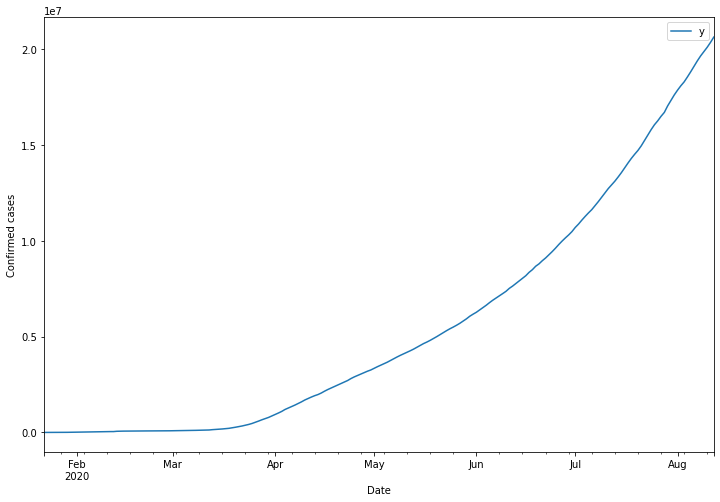

In [ ]:
ax = confirmed_case.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Confirmed cases')
ax.set_xlabel('Date')

plt.show()

In [ ]:
t=time()
model = Prophet(interval_width=1)
model.fit(confirmed_case)
future.tail()
print("The processing Time is: ", time()- t,"seconds")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The processing Time is:  0.23412370681762695 seconds


In [ ]:
future_dates = model.make_future_dataframe(periods=7)
future_dates.tail()

,ds
206,2020-08-15
207,2020-08-16
208,2020-08-17
209,2020-08-18
210,2020-08-19


In [ ]:
#predicting the future with date, and upper and lower limit of y value
t=time()
fore_confirm_cases = model.predict(future_dates)
fore_confirm_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#print("The processing Time is: ", time()- t,"seconds")

,ds,yhat,yhat_lower,yhat_upper
206,2020-08-15,2.115972e+07,2.096043e+07,2.138468e+07
207,2020-08-16,2.139001e+07,2.118575e+07,2.161591e+07
208,2020-08-17,2.161685e+07,2.131899e+07,2.188601e+07
209,2020-08-18,2.185302e+07,2.157746e+07,2.231612e+07
210,2020-08-19,2.210201e+07,2.176622e+07,2.258244e+07


The processing Time is:  0.07785367965698242 seconds


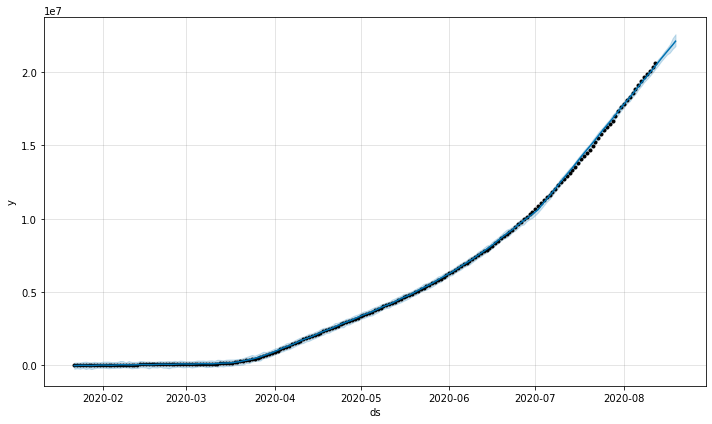

In [ ]:
t=time()
model.plot(fore_confirm_cases)
print("The processing Time is: ", time()- t,"seconds")

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

One other particularly strong feature of Prophet is its ability to return the components of our forecasts

The processing Time is:  0.13826775550842285 seconds


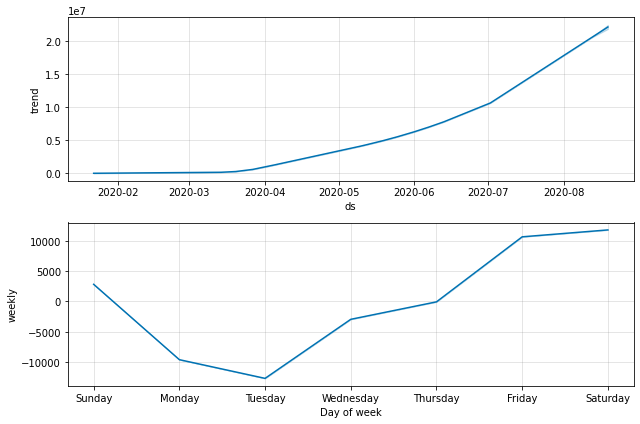

In [ ]:
t=time()
fore_confirmed_plot =model.plot_components(fore_confirm_cases)
print("The processing Time is: ", time()- t,"seconds")

Forecasting **Recovered COVID-19** Cases Worldwide

---



In [ ]:
t=time()
recovered_case.columns = ['ds','y']
recovered_case['ds'] = pd.to_datetime(recovered_case['ds'])
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.006625652313232422 seconds


In [ ]:
recovered_case.tail(10)

,ds,y
194,2020-08-03,10913000.0
195,2020-08-04,11134735.0
196,2020-08-05,11356275.0
197,2020-08-06,11545401.0
198,2020-08-07,11737927.0
199,2020-08-08,11939109.0
200,2020-08-09,12115825.0
201,2020-08-10,12280520.0
202,2020-08-11,12585473.0
203,2020-08-12,12826815.0


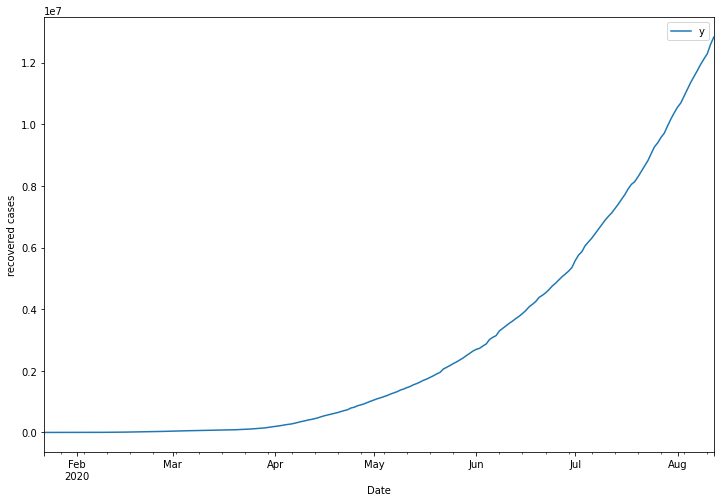

In [ ]:
ax = recovered_case.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('recovered cases')
ax.set_xlabel('Date')

plt.show()

In [ ]:
model = Prophet(interval_width=0.99)
model.fit(recovered_case)
future = model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
206,2020-08-15
207,2020-08-16
208,2020-08-17
209,2020-08-18
210,2020-08-19


In [ ]:
#predicting the future with date, and upper and lower limit of y value
fore_recovered_cases = model.predict(future)
fore_recovered_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
206,2020-08-15,1.296014e+07,1.274578e+07,1.319947e+07
207,2020-08-16,1.311748e+07,1.291290e+07,1.333703e+07
208,2020-08-17,1.328606e+07,1.305567e+07,1.350514e+07
209,2020-08-18,1.345807e+07,1.321995e+07,1.367190e+07
210,2020-08-19,1.364023e+07,1.340062e+07,1.384522e+07


The processing Time is:  0.07153034210205078 seconds


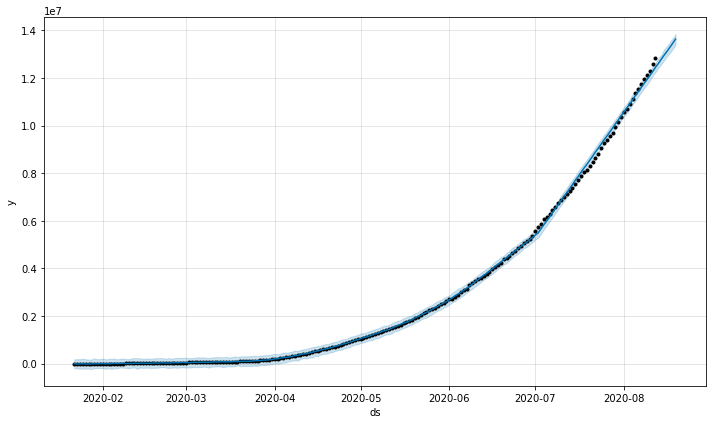

In [ ]:
t=time()
fore_recovered_plot = model.plot(fore_recovered_cases)
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.1452038288116455 seconds


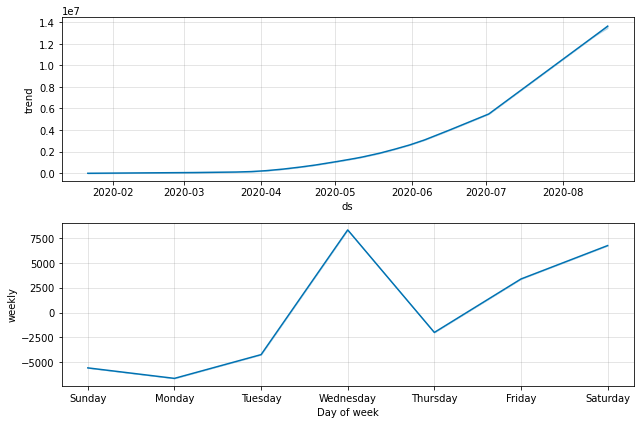

In [ ]:
t=time()
fore_recovered_plot =model.plot_components(fore_recovered_cases)
print("The processing Time is: ", time()- t,"seconds")

Forecasting Deaths COVID-19 Cases Worldwide

In [ ]:
deaths_case.columns = ['ds','y']
deaths_case['ds'] = pd.to_datetime(deaths_case['ds'])
deaths_case.tail()

,ds,y
199,2020-08-08,726781.0
200,2020-08-09,731326.0
201,2020-08-10,736191.0
202,2020-08-11,742615.0
203,2020-08-12,749358.0


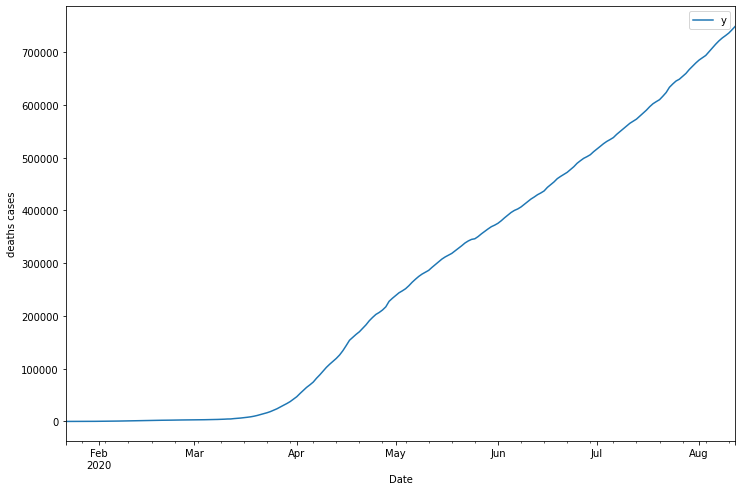

In [ ]:
ax = deaths_case.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('deaths cases')
ax.set_xlabel('Date')

plt.show()

In [ ]:
model = Prophet(interval_width=1)
model.fit(deaths_case)
future = model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
206,2020-08-15
207,2020-08-16
208,2020-08-17
209,2020-08-18
210,2020-08-19


In [ ]:
#predicting the future with date, and upper and lower limit of y value
fore_deaths_cases = model.predict(future)
fore_deaths_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
206,2020-08-15,763386.996277,759953.443815,766672.531673
207,2020-08-16,767978.653735,764342.175895,771812.569253
208,2020-08-17,772728.159001,768482.224957,777014.843839
209,2020-08-18,778751.052249,773922.683180,785162.906580
210,2020-08-19,785077.428204,778571.315519,791899.007997


The processing Time is:  0.07483077049255371 seconds


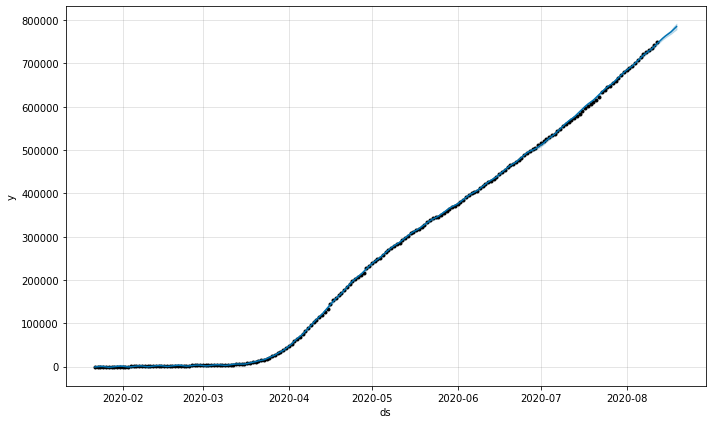

In [ ]:
t=time()
deaths_fore_plot = model.plot(fore_deaths_cases)
print("The processing Time is: ", time()- t,"seconds")

The processing Time is:  0.14447999000549316 seconds


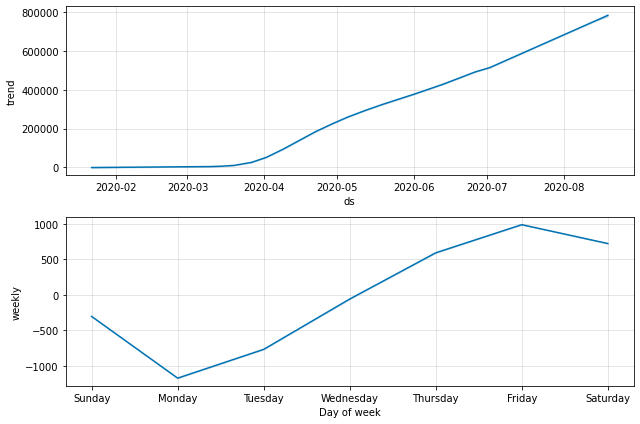

In [ ]:
t=time()
deaths_fore_plot =model.plot_components(fore_deaths_cases)
print("The processing Time is: ", time()- t,"seconds")